## Тестовое задание на должность продуктового аналитика

### Задания на логику

**Задание 1**

Вы попали на аналитическую конференцию. В ней приняли участие 80 специалистов: 40 продуктовых аналитиков и 40 ML-инженеров. 30 продуктовых аналитиков и 20 ML-инженеров пойдут на лекцию, посвященную архитектуре баз данных. Известно, что случайно выбранный продуктовый аналитик пойдет на лекцию по архитектуре баз данных с вероятностью 75%. Какова вероятность того, что случайно выбранный посетитель лекции, посвященной архитектуре баз данных, окажется ML-инженером?

In [88]:
# Вероятность того, что случайно выбранный посетитель лекции окажется ML-инженером,
# равна отношению числа ML-инженеров к общему числу участников лекции.

# Исходные данные
total_pa = 40   # Всего продуктовых аналитиков
total_ml = 40   # Всего ML-инженеров

# Количество посетителей лекции
pa_on_lecture = 30  # 75% от 40 (30/40 = 0.75)
ml_on_lecture = 20  # 50% от 40 (20/40 = 0.5)

# Общее количество посетителей лекции
total_on_lecture = pa_on_lecture + ml_on_lecture

# Вероятность, что случайный посетитель лекции — ML-инженер
prob_ml = ml_on_lecture / total_on_lecture

# Форматируем вывод
print(f"Вероятность, что посетитель лекции — ML-инженер: {prob_ml:.0%}")

Вероятность, что посетитель лекции — ML-инженер: 40%


**Задание 2**

Есть поверье, что если спортсмен побывал на обложке “Sports illustrated”, то вскоре после этого с этим спортсменом случается спортивная неудача или снижение спортивного результата. Одной жертвой “проклятья” в 2000 году стал русский гимнаст Иван Иванков, которого назвали лучшим спорстменом мира, после чего он не смог даже отобраться на летние Олимпийские игры. Действительно “Sports illustrated” является носителем проклятья или это можно объяснить каким-либо феноменом?

Ответ:

Это ключевой феномен, который объясняет "проклятие". Спортсмены попадают на обложку журнала Sports Illustrated, когда они показывают выдающиеся результаты (например, победа на чемпионате, установление рекорда). Однако такие результаты часто являются пиком их карьеры, и после этого их показатели естественным образом возвращаются к среднему уровню. Это не связано с "проклятием", а просто отражает естественные колебания в спортивных результатах.

Пример:

Если спортсмен обычно показывает результат 8/10, но однажды достигает 10/10, то вероятнее всего, следующий результат будет ближе к его среднему уровню (например, 8/10), а не к пиковому.

Так что журнал Sports Illustrated не является носителем проклятия, а просто фиксирует исключительные моменты, которые редко повторяются.

### Задание с кодом

Вы работаете junior аналитиком в компании, создающей мобильные игры. Вам необходимо проанализировать данные, содержащие информацию об игроке, - его уровень, страна, платформа, дата регистрации и дата login’a. Эти данные помогут сформулировать представление об аудитории игры.

Вопросы:
- Для каждой платформы определите топ 5 стран по количеству игроков.
- Какой максимальный lifetime у игроков в игре?
- Какое количество игроков находится выше 20 уровня?
- Посчитайте средний уровень игроков для каждой страны.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка данных
df = pd.read_csv('Analytics test - analytics_test.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  1000 non-null   object
 1   pl       1000 non-null   int64 
 2   plf      1000 non-null   object
 3   reg      1000 non-null   int64 
 4   ts       1000 non-null   int64 
 5   user     1000 non-null   object
dtypes: int64(3), object(3)
memory usage: 47.0+ KB
None


,country,pl,plf,reg,ts,user
0,IT,33,Android,1511191920859,1586044805457,1122239prod-eu
1,IN,33,Android,1509074590554,1586045807421,147065prod-us
2,TR,33,iOS,1575420775882,1586047059117,25564086prod-eu
3,HK,12,Android,1584406076183,1586045087568,10123050prod-as
4,CN,21,Android,1581887511291,1586046421744,9893956prod-as


**_Для каждой платформы определите топ 5 стран по количеству игроков._**

In [ ]:
# Узнаем какие платформы есть в дата сете, и создадим список в котором будут храниться данные
plat = [] # coздадим список в котором будут храниться названия платформ
platform = df['plf'].value_counts() # находим все платформы
for el in platform.index: # итерируем Series, который вернул value_counts по индексу (названию платформы) 
    plat.append(el) # складываем все индексы (названия платформ) в подготовленный список

# используем наш список в цикле для перебора df 
for el in plat: 
    sort = df.loc[df['plf'] == el] # Фильтруем наш список что-бы остались только значения передаваемые циклом из списка "plat" 
    print(f'ТОП 5 стран для платформы {el}:\n {sort['country'].value_counts().head()}\n') # сортируем топ 5 стран с самым большим количеством игроков
    
    # Добаваим графику для каждой платформы 
    plt.figure(figsize=(20, 4))  # Устанавливаем размер графика
    sns.histplot(data=sort, x='country', bins=10, kde = True, color='red')
    plt.title(f'Распределение игроков в странах для платформ {el}')
    plt.xlabel('Страны')
    plt.ylabel('Кол-во игроков')
    plt.xticks(rotation=90)  # Поворачиваем метки на оси X на 90 градусов
    
    plt.show()
    

Вывод: 
- На графиках видно количество в каких странах и на каких платформах больше всего игроков. 
- Так-же мы можем сделать вывод о том, на каких плаформах играет большинство игроков (изучив графики понимаем что это Андроид)
- Изучив статистику выяснил, CN страна с самым большим количествои игроком, лидирующая платформа iOS

**_Какой максимальный lifetime у игроков в игре?_**

In [41]:
# P.S. не совсем понимаю что такое lifetime, поэтому определю это как отношение даты регистрации к последнему заходу

df['lifetime'] = df['reg'] - df['ts'] # Создадим новую колонку где будем хранить отношение даты регистрации к последнему заходу

# Создадим переменную где будем хранить рекордное значение из df[lifetime]
player_index = df['lifetime'].idxmin() # чем меньше (больше по модулю) число тем больше разница между датой рег. и последним заходом \
                                       # соотвественно чем больше разница тем раньше человек в игре
df.iloc[player_index] # Получаем информацию о нашем первом пользователе

country                IN
pl                     33
plf               Android
reg         1509074590554
ts          1586045807421
user        147065prod-us
lifetime     -76971216867
Name: 1, dtype: object

**_Какое количество игроков находится выше 20 уровня?_**

277 игроков находится выше 20 уровня!
27.7 %  игроков находится выше 20 уровня!

страна: CN    кол-во: 63
страна: IN    кол-во: 33
страна: RU    кол-во: 22
страна: VN    кол-во: 14
страна: ID    кол-во: 13


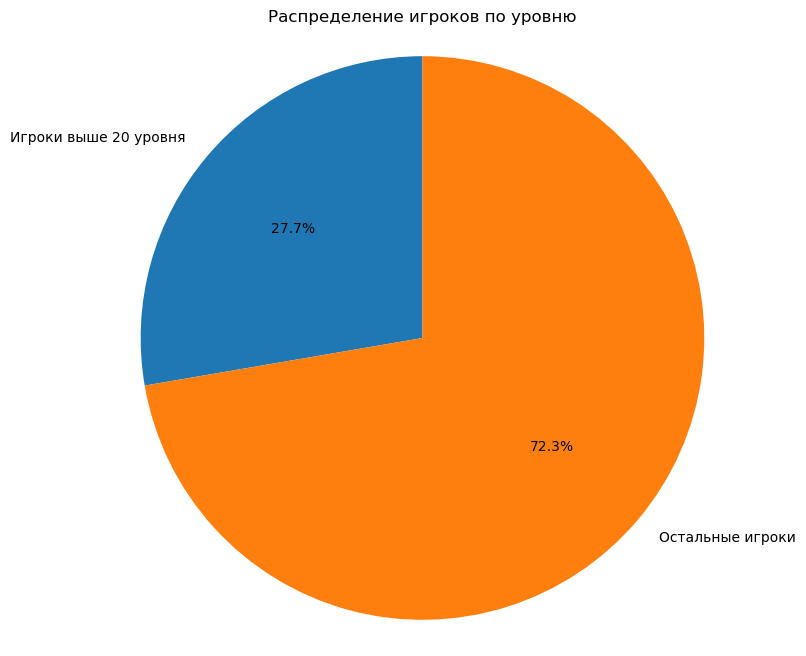

In [75]:
lvl20_plus = df.loc[df['pl'] >= 20] # выбираем только тех и грроков которые больше или равны 20 уровню 
print(f'{len(lvl20_plus)} игроков находится выше 20 уровня!') # Выводим длину df с оставшимися игроками 

# посчитаем процент от общей массы игроков, так же узнаем из какой странны большинство игроков чей уровень выше 20, выведем диограмму

# счтаем процент 
percent = (len(lvl20_plus)/ len(df)) * 100
print(f'{percent:.1f} %  игроков находится выше 20 уровня!\n') 

# узнаем из какой странны большинство игроков чей уровень выше 20
top5_20lvl_country = lvl20_plus['country'].value_counts().head()
for index, value in top5_20lvl_country.items():
    print(f'страна: {index}    кол-во: {value}')

# нарисуем диограмму 
# подготовим данные 
players_above_20 = len(lvl20_plus)
total_players = len(df)
players_below_20 = total_players - players_above_20

# Данные для круговой диаграммы
sizes = [players_above_20, players_below_20]
labels = ['Игроки выше 20 уровня', 'Остальные игроки']

# Создание круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Чтобы диаграмма была круговой, а не эллиптической
plt.title('Распределение игроков по уровню')

# Отображение диаграммы
plt.show()


Вывод: Игроки нормально распределенны по уровням, можно добавить в игру Poyal Pass для привлечения игроков. Добавить новых уровней, усложнить возможность получения следущего, но добавить эксклюзивных наград за получение уровня, и разбить уровень на микропроцессы что-бы больше заинтресовать пользователя (ощущение что до получения нового уровня осталось совсем не много).

**_Посчитайте средний уровень игроков для каждой страны_**

In [81]:
# Группируем данные и вычисляем среднее значение
mean_lvl = df.groupby('country')['pl'].mean().round() 

# Преобразуем результат в DataFrame
mean_lvl_df = mean_lvl.reset_index()
mean_lvl_df.columns = ['Country', 'Average Level']

# Устанавливаем максимальное количество отображаемых строк на None (что-бы вывести весь df)
pd.set_option('display.max_rows', None)  
mean_lvl_df

,Country,Average Level
0,AE,13.0
1,AF,12.0
2,AL,12.0
3,AM,12.0
4,AO,22.0
5,AR,8.0
6,AT,33.0
7,AU,23.0
8,AZ,17.0
9,BD,9.0


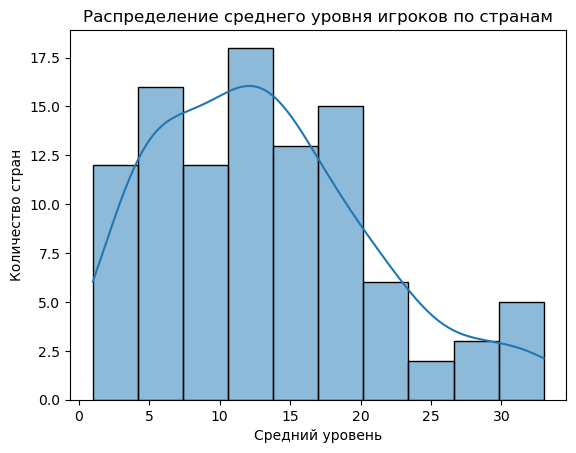

In [85]:
# Построение гистограммы
sns.histplot(data=mean_lvl_df, x='Average Level', bins=10, kde=True)

# Настройка заголовка и меток осей
plt.title('Распределение среднего уровня игроков по странам')
plt.xlabel('Средний уровень')
plt.ylabel('Количество стран')

# Отображение гистограммы
plt.show()

Вывод: Надблюдаем что большинство игроков находится на медианном уровне (17), возможно стоит добавить новый тип игры (безрейтинговый или свободный режим или режим открытого мира, креатив, анархия) с возможностью поиска или получения ресурсов с небольшим донатом или решением особых миссий, за что игрок будет получать доп. опыт и экслюзивные предметы.